Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
20 20 2 2


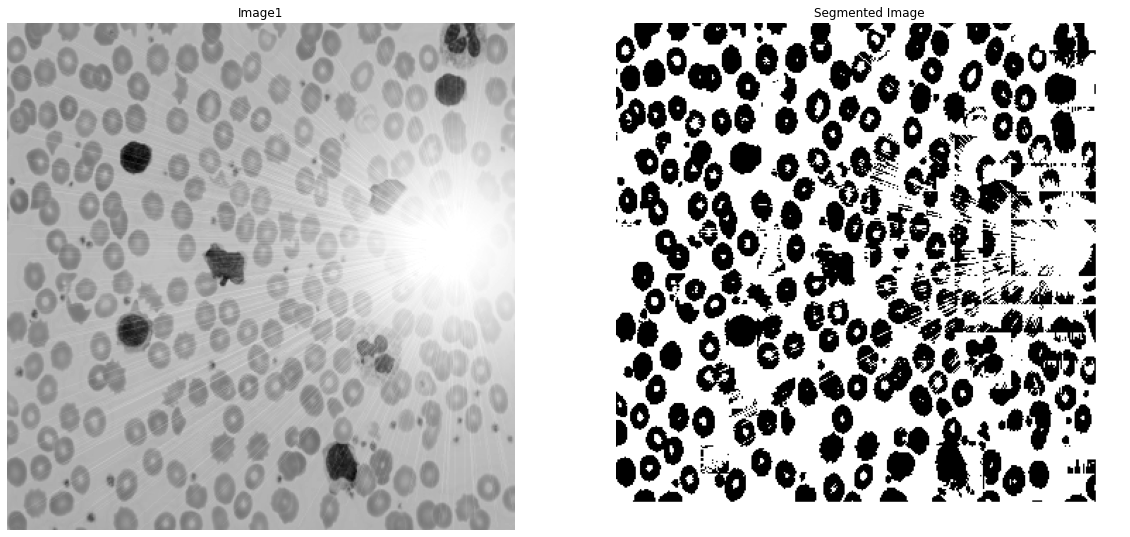

In [59]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/gdrive') 
#영상 불러오기
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/cell-bright.bmp')

# color영상을 gray영상으로 만들기
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#가로세로 블록의 개수 
N=18
#블록 당 가로와 세로 크기 계산 
dimh=np.int32(gray_img.shape[0]/N)
dimw=np.int32(gray_img.shape[1]/N)
#연산에서 제외될 영상 가장자리 크기 계산 
dh_rest = np.int32(gray_img.shape[0]%N)
dw_rest =np.int32(gray_img.shape[1]%N)
# 임계값 적용 후 이진 영상을 담을 기억 장소 생성 
mean_img = np.zeros((N,N)) #블록의 평균값 저장 배열
output_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# 각 블록의 평균값 계산을 위한 함수
def mean_function(img,dimh,dimw,h,w): 
   count=1
   sum=0
   ave=0
   for y in range(h, h+dimh):
    for x in range(w, w+dimw):
       sum = sum+img[y,x]
       count = count+1
   # 블록별 픽셀 평균 계산    
   ave = np.int32(sum/count) 
   return ave

#각 블록의 평균값 계산
for h in range(0,img.shape[0]-dh_rest,dimh):
    for w in range(0,img.shape[1]-dw_rest,dimw):
         if(h+dimh <img.shape[0] and w+dimw<img.shape[1]):
         	        mean_img[np.int32(h/dimh),np.int32(w/dimw)]= mean_function(gray_img,dimh,dimw,h,w)
 
print(dimh,dimw, dy_rest, dx_rest)
#각 블록에 대해 임계값 적용 및 이진화 작업 수행
for h in range(0,gray_img.shape[0]-dh_rest):
  for w in range(0,gray_img.shape[1]-dw_rest):
    if(gray_img[h,w]>= mean_img[np.int32(h/dimh),np.int32(w/dimw)]):
        output_img[h,w]=255
    else:
        output_img[h,w]=0 

#그림을 화면에 출력
plt.figure(figsize=(20,20))# 영상의 크기를 키워주자
plt.subplot(1,2,1)
plt.title("Image1")
plt.imshow(gray_img, cmap='gray')
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Segmented Image")
plt.imshow(output_img, cmap='gray')
plt.axis("off")
plt.show()

In [ ]:
)